## Análisis del tráfico en el sitio

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import calendar

In [32]:
# Cargo solo las columnas que voy a necesitar para calcular el trafico
datos = pd.read_csv('/home/lautaro/Desktop/events.csv', usecols = lambda col: col in ["timestamp", "event"])

In [41]:
# Obtengo todas las visitas fitrando por la columna de evento
visitas = datos.loc[datos["event"] == "visited site", ["timestamp"]]
# Creo las columnas de "mes" y "cantidad" para facilitar los calculos
visitas["timestamp"] = pd.to_datetime(visitas["timestamp"])
visitas["mes"] = visitas["timestamp"].dt.month
visitas["nombre_mes"] = visitas["mes"].apply(lambda x: calendar.month_abbr[x])
visitas["cantidad"] = 1
visitas = visitas.loc[:,["mes","nombre_mes", "cantidad"]]

In [42]:
visitas = visitas.groupby(["mes", "nombre_mes"], as_index=False).sum()
print(visitas)

   mes nombre_mes  cantidad
0    1        Jan      2135
1    2        Feb      2790
2    3        Mar      7247
3    4        Apr     12650
4    5        May     40137
5    6        Jun     22419


Text(0,0.5,'Cantidad de visitas')

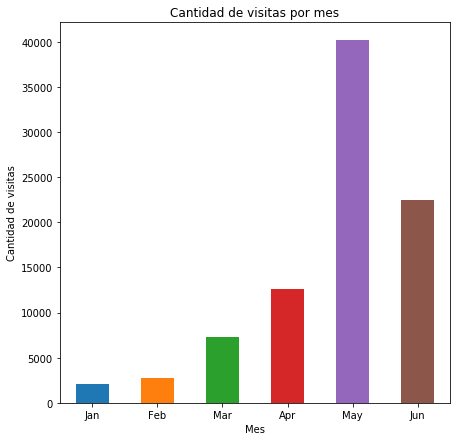

In [45]:
visitas.plot(kind="bar",rot=0, figsize=(7,7), legend=False, x="nombre_mes", y="cantidad")
plt.title("Cantidad de visitas por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de visitas")